In [167]:
import pandas as pd
import glob

#Importing all the files together and putting them in one df
files = glob.glob("states*.csv")
census_list = []

for file in files:
    running_file = pd.read_csv(file)
    census_list.append(running_file)

census_df = pd.concat(census_list)

#Checking the columns in the big dataframe
print(census_df.columns)

#Checking the datatype in the big dataframe
print(census_df.dtypes)

#Converting the income into a different column without '%'

census_df.Income = census_df['Income'].replace('[\$,]','', regex=True)
census_df.Income = pd.to_numeric(census_df.Income)


Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')
Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object


In [168]:
#Separating the GenderPop data into two columns
split_df = census_df['GenderPop'].str.split('(\d+)', expand=True)
census_df['Male'] = split_df.get(1)
census_df['Female'] = split_df.get(3)

#Converting to numeric
census_df.Male = pd.to_numeric(census_df['Male'])
census_df.Female = pd.to_numeric(census_df['Female'])

print(census_df.dtypes)

Unnamed: 0      int64
State          object
TotalPop        int64
Hispanic       object
White          object
Black          object
Native         object
Asian          object
Pacific        object
Income        float64
GenderPop      object
Male            int64
Female        float64
dtype: object


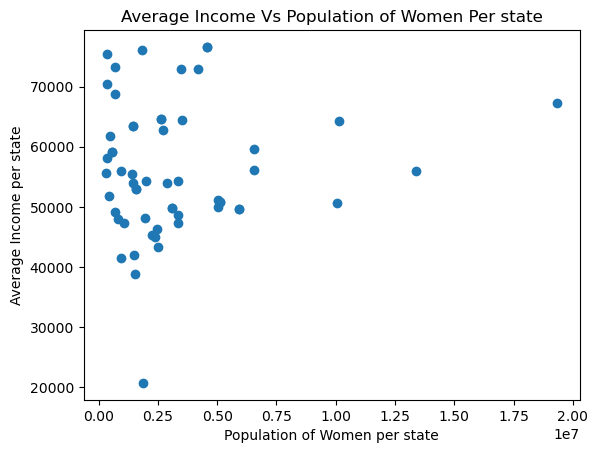

<Figure size 640x480 with 0 Axes>

In [169]:
import matplotlib.pyplot as plt
plt.scatter( census_df.Female, census_df.Income)
plt.title('Average Income Vs Population of Women Per state')
plt.xlabel('Population of Women per state')
plt.ylabel('Average Income per state')
plt.show()
plt.clf()

In [170]:
#filling up empty population

census_df['Female'] = census_df.Female.fillna(census_df.TotalPop - census_df.Male)
print(census_df['Female'])

0      543273.0
1     2455167.0
2      419713.0
3     3331859.0
4    13367298.0
5     1444150.0
0     1444150.0
1      318031.0
2     4195682.0
3     3497739.0
4      937789.0
5     2890732.0
0     3057895.0
1     3455936.0
2     5038598.0
3     2727005.0
4     1536358.0
5     3081445.0
0     3081445.0
1      504536.0
2      939759.0
3     1390901.0
4      670717.0
5     4561386.0
0     5913084.0
1     1942789.0
2     1990780.0
3     6534215.0
4     1869213.0
5      543273.0
0     4561386.0
1     1051703.0
2    10131373.0
3     5049925.0
4      353677.0
5     5913084.0
0     5123362.0
1      696428.0
2      806083.0
3     6556862.0
4     3333382.0
5     1558931.0
0     1558931.0
1     1453125.0
2     2233145.0
3     2364097.0
4      679019.0
5     3057895.0
0     2630239.0
1     1841615.0
2      478041.0
3      340810.0
4    10045763.0
5     5123362.0
0     2489527.0
1      349215.0
2     3342840.0
3     1506295.0
4    19334329.0
5     2630239.0
Name: Female, dtype: float64


In [171]:
#dropping duplicates
census = census_df.drop_duplicates(subset = census_df.columns[1:])

#checking for dupkicates
census.duplicated(subset = census.columns[1:])

0    False
1    False
2    False
3    False
4    False
5    False
1    False
2    False
3    False
4    False
5    False
0    False
1    False
2    False
3    False
4    False
5    False
1    False
2    False
3    False
4    False
5    False
0    False
1    False
2    False
3    False
4    False
1    False
2    False
3    False
4    False
0    False
1    False
2    False
3    False
4    False
5    False
1    False
2    False
3    False
4    False
0    False
1    False
2    False
3    False
4    False
0    False
1    False
2    False
3    False
4    False
dtype: bool

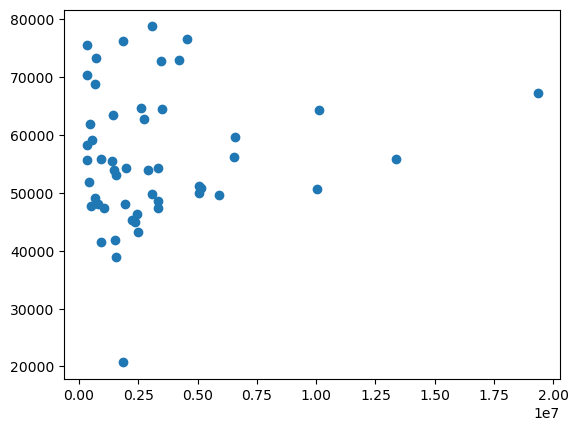

In [172]:
plt.scatter(census.Female, census.Income)
plt.show()

/var/folders/1r/ltn9_mw94s34h13zy3w9q0tm0000gn/T/ipykernel_3105/3611399755.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  census[race] = census[race].replace('[%]','',regex=True)
/var/folders/1r/ltn9_mw94s34h13zy3w9q0tm0000gn/T/ipykernel_3105/3611399755.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  census[race] = pd.to_numeric(census[race])
/var/folders/1r/ltn9_mw94s34h13zy3w9q0tm0000gn/T/ipykernel_3105/3611399755.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

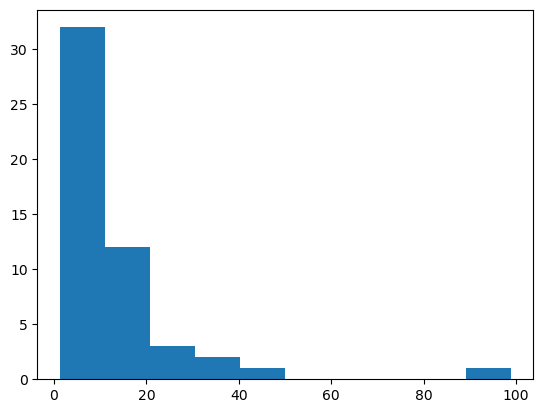

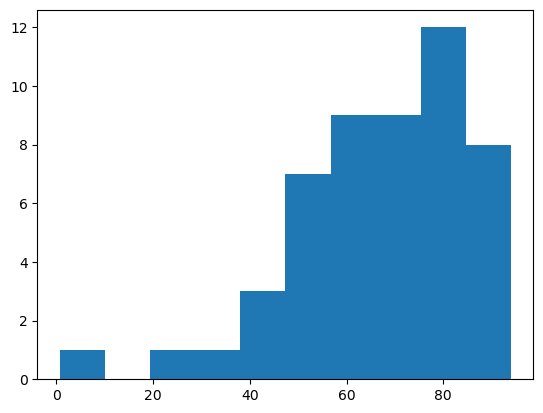

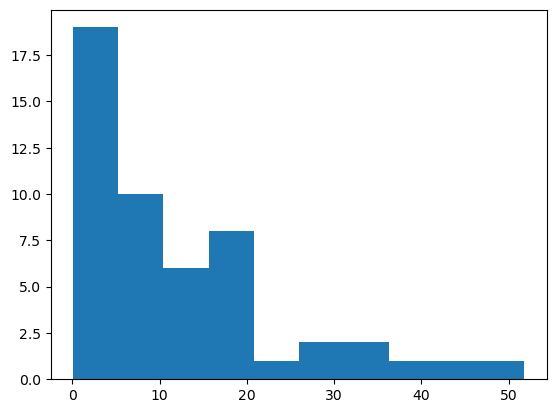

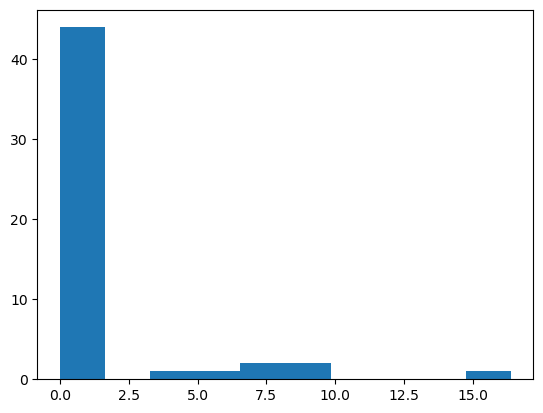

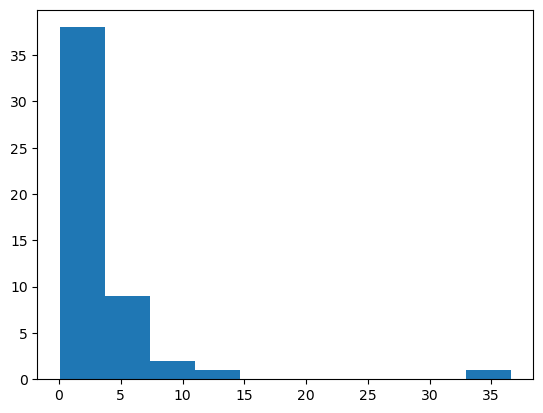

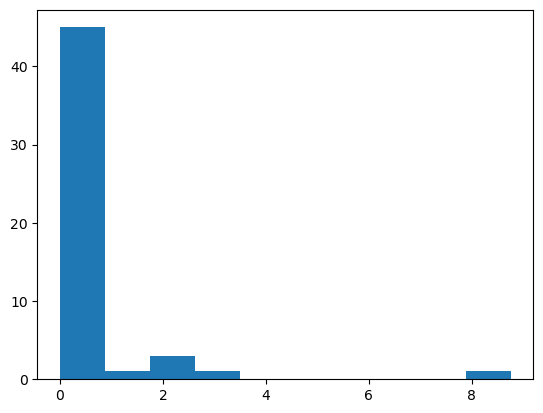

<Figure size 640x480 with 0 Axes>

In [180]:
race_list = census.columns[3:9]
race_list = list(race_list)

for race in race_list:
    census[race] = census[race].replace('[%]','',regex=True)
    census[race] = pd.to_numeric(census[race])

census['Pacific'] = census['Pacific'].fillna(100-census['Hispanic'] - census['White'] - census['Black'] - census['Native'] - census['Asian'])

for race in race_list:
    plt.hist(census[race])
    plt.show()
    plt.clf()
